In [236]:
# Improt library
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("clean_data_combined.csv")
df_io = pd.read_csv("Industry and Occupation.csv") # use the same variable with other teammates
df2 = pd.read_csv("salary.csv")


In [237]:
# Check the data to understand the strcture
print(df.head())
print(df_io.head())
print(df2.head())


  Age Group                                         Occupation    2024  \
0  All Ages                                    All Occupations  2365.6   
1  All Ages  Managers & Administrators (Including Working P...   404.9   
2  All Ages                                      Professionals   619.9   
3  All Ages              Associate Professionals & Technicians   483.1   
4  All Ages                           Clerical Support Workers   209.6   

     2023    2022    2021    2020    2019    2018    2017  ...    2009   2008  \
0  2352.3  2350.4  2286.5  2222.6  2230.4  2203.7  2175.3  ...  1869.4   1852   
1   369.9   407.7   377.7   368.3   364.9   341.6   348.8  ...   310.8  303.3   
2   620.6   600.9   577.5   504.2   469.4   449.2   437.6  ...   341.8  334.5   
3   482.5   485.7   465.8   458.2   467.9     465   436.2  ...   309.8  307.8   
4   207.8   211.8   223.4   215.6   237.2     241   247.9  ...   236.5    237   

     2007    2005    2004    2003    2002    2001    2000  Sex  
0  

In [238]:
# Check and identify year columns
year_cols = [col for col in df.columns if col.isdigit()]
year_cols = sorted(year_cols, key=int)
year_min, year_max = int(year_cols[0]), int(year_cols[-1])

# Clean numeric columns to prevent error
for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Filter totals only as we want to show all data
filtered = df[(df['Sex']=='All') & (df['Age Group']=='All Ages') & (df['Occupation']=='All Occupations')]

## Employment Trend Over the Year

In [239]:
# Filter only for "All" or total data (All groups and All occupations)
total_df = df[
    (df["Sex"] == "All") &
    (df["Age Group"] == "All Ages") &
    (df["Occupation"] == "All Occupations")]

# Calculate the total employment for each year
total_employment = total_df[year_cols].sum()

# Create a dataframe for the data reuslt
total_emp_trend_df = pd.DataFrame({
    "Year": [int(y) for y in year_cols],
    "Total Employment": total_employment.values})

total_emp_trend_df

,Year,Total Employment
0,2000,1482.6
1,2001,1582.5
2,2002,1573.7
3,2003,1605.4
4,2004,1632.1
5,2005,1647.3
6,2007,1803.2
7,2008,1852.0
8,2009,1869.4
9,2010,1962.9


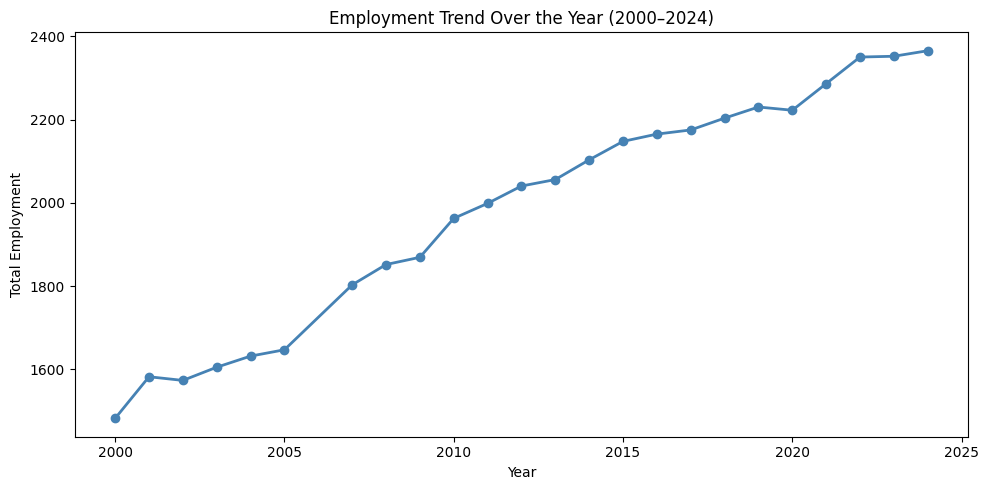

In [240]:
# Create the visualization
plt.figure(figsize=(10,5))
plt.plot(total_emp_trend_df["Year"], total_emp_trend_df["Total Employment"], color="steelblue", marker="o", linewidth=2)

plt.title("Employment Trend Over the Year (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Total Employment")
plt.tight_layout()
plt.show()

### Employment Trend Over the Year

- **Total employment in Singapore has grown steadily** from 2000 to 2024, reflecting a strong and expanding job market or economic condition.  
- The workforce increased from around **1.5 million to over 2.3 million**.
- Slight decrease can be seen when **global economic slowdowns** happened, such as 2008-2009 and 2020 (during the pandemic), but recovery is typically quick.

## Employment Growth Over the Year

In [241]:
# Calculate year-to-year growth rates
growth_by_year = {}

# Create looping
for i in range(1, len(year_cols)):
    prev_year = str(year_cols[i-1])
    curr_year = str(year_cols[i])
    
    total_previous = filtered[prev_year].sum()
    total_current = filtered[curr_year].sum()
    
    if total_previous > 0:
        growth_rate_yoy = ((total_current - total_previous) / total_previous) * 100
    else:
        growth_rate_yoy = None  # Avoid division by zero
    
    growth_by_year[f"{prev_year}-{curr_year}"] = growth_rate_yoy

# Convert to DataFrame for creating the table of each year period and its growth
growth_df = pd.DataFrame(list(growth_by_year.items()), columns=['Period', 'Growth (%)'])
growth_df


,Period,Growth (%)
0,2000-2001,6.738163
1,2001-2002,-0.556082
2,2002-2003,2.014361
3,2003-2004,1.663137
4,2004-2005,0.931315
5,2005-2007,9.463971
6,2007-2008,2.706300
7,2008-2009,0.939525
8,2009-2010,5.001605
9,2010-2011,1.834021


### Year-to-Year Employment Growth

- **Overall, Singapore’s job market has grown steadily** over 2000 to 2024 period.
- **A decrease in employment growth in 2001–2002 (−0.6%)**, due to a global economic slowdown following the US recession (Source: Ministry of Manpower Singapore).
- **COVID-19 impact:** A slight decreased in **2019–2020 (−0.35%)** aligns with the pandemic period, but the quick **recovery in 2021–2022 (+2.8%)** reflects Singapore’s resilience and adaptability in the job market.
- **Recent years (2022–2024):** Growth has slowed again (under **1%**), suggesting the economy is stabilizing after the pandemic rebound.


## Gender Distribution in Each Year

In [242]:
# Analyze gender distribution each year
gender_df = df[
    (df["Sex"].isin(["Male", "Female"])) &
    (df["Age Group"] == "All Ages") &
    (df["Occupation"] == "All Occupations")]
male_total = gender_df[gender_df["Sex"] == "Male"][year_cols].sum().values
female_total = gender_df[gender_df["Sex"] == "Female"][year_cols].sum().values

# Calculate the distribution percentage
total = male_total + female_total
male_share = (male_total / total) * 100
female_share = (female_total / total) * 100

# Show the result in dataframe
gender_share_df = pd.DataFrame({
    "Year": year_cols,
    "Male (%)": [round(i, 2) for i in male_share],
    "Female (%)": [round(i, 2) for i in female_share]
})

gender_share_df

,Year,Male (%),Female (%)
0,2000,60.00,40.00
1,2001,59.30,40.70
2,2002,59.59,40.41
3,2003,59.10,40.90
4,2004,58.87,41.13
5,2005,58.26,41.74
6,2007,57.59,42.41
7,2008,56.89,43.11
8,2009,57.03,42.97
9,2010,56.37,43.63


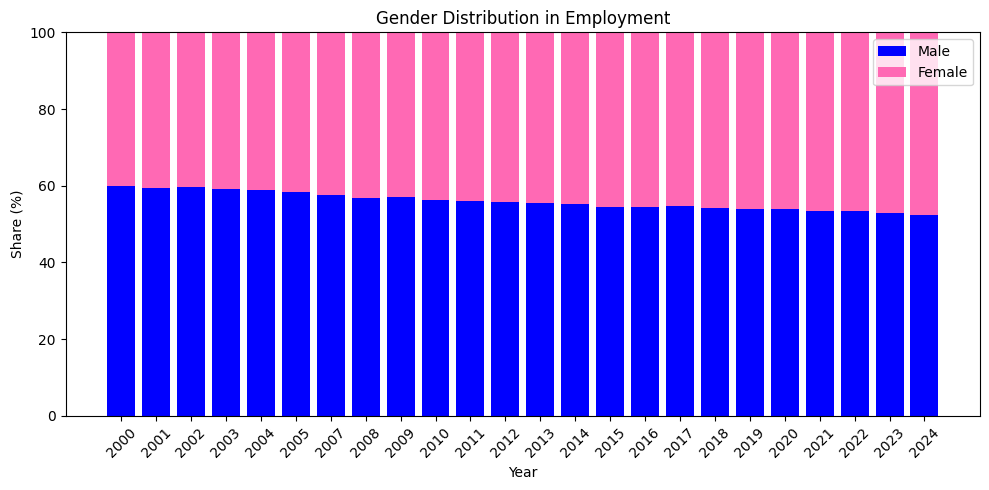

In [243]:
# Create the visualization with stacked bar chart
plt.figure(figsize=(10,5))
plt.bar(gender_share_df["Year"], gender_share_df["Male (%)"], color="blue", label="Male")
plt.bar(gender_share_df["Year"], gender_share_df["Female (%)"],
        bottom=gender_share_df["Male (%)"], color="hotpink", label="Female")

plt.title("Gender Distribution in Employment")
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

### Gender Distribution Over Year

- **Female participation in the workforce has grown steadily** over the past two decades.  
  In 2000, female made up around 40% of total employment. While in 2024, the contribution increased to nearly **47.7%**.  
- **Male employment share has gradually declined**, decreasing from roughly **60% to 52.3%**, reflecting a more balanced gender composition in Singapore’s job market.  
- The consistent upward trend for women indicates **greater inclusion and equal access to career opportunities** in Singapore's job market.


## Age Group Distribution in Latest Available Year

In [244]:
# Get the latest available year from data (which is 2024)
target_year = int(year_cols[-1])
year_col = str(target_year)

# Filter for total employment by age
age_df = df[
    (df["Age Group"] != "All Ages") &
    (df["Occupation"] == "All Occupations") &
    (df["Sex"] == "All")]

# Group and summarize
age_group_df = age_df.groupby("Age Group")[year_col].sum().reset_index()
age_group_df.rename(columns={year_col: "Employment Count"}, inplace=True)

# Order age groups
age_order = [
    "15-19 Years Old", "20-24 Years Old", "25-29 Years Old",
    "30-34 Years Old", "35-39 Years Old", "40-44 Years Old",
    "45-49 Years Old", "50-54 Years Old", "55-59 Years Old",
    "60-64 Years Old", "65 Years & Over"]

age_group_df["Age Group"] = pd.Categorical(age_group_df["Age Group"], categories=age_order, ordered=True)
age_group_df = age_group_df.sort_values("Age Group")

# Show the dataframe
age_group_df


,Age Group,Employment Count
0,15-19 Years Old,25.1
1,20-24 Years Old,106.5
2,25-29 Years Old,203.7
3,30-34 Years Old,269.6
4,35-39 Years Old,282.2
5,40-44 Years Old,285.0
6,45-49 Years Old,262.7
7,50-54 Years Old,260.7
8,55-59 Years Old,220.1
9,60-64 Years Old,202.7


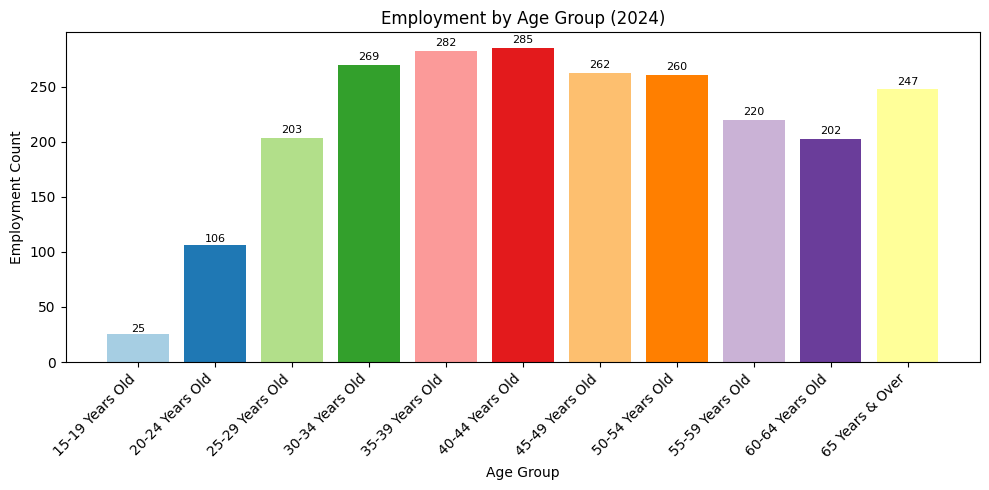

In [245]:
# Create the visualization by using bar chart
plt.figure(figsize=(10,5))
bars = plt.bar(age_group_df["Age Group"], age_group_df["Employment Count"], color=plt.cm.Paired.colors)

# Add labels in the bar chart
for i, val in enumerate(age_group_df["Employment Count"]):
    plt.text(i, val + (val * 0.01), f"{int(val):,}", ha="center", va="bottom", fontsize=8)

plt.title(f"Employment by Age Group ({target_year})")
plt.xlabel("Age Group")
plt.ylabel("Employment Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Employment Trends by Age Group (2000–2024)

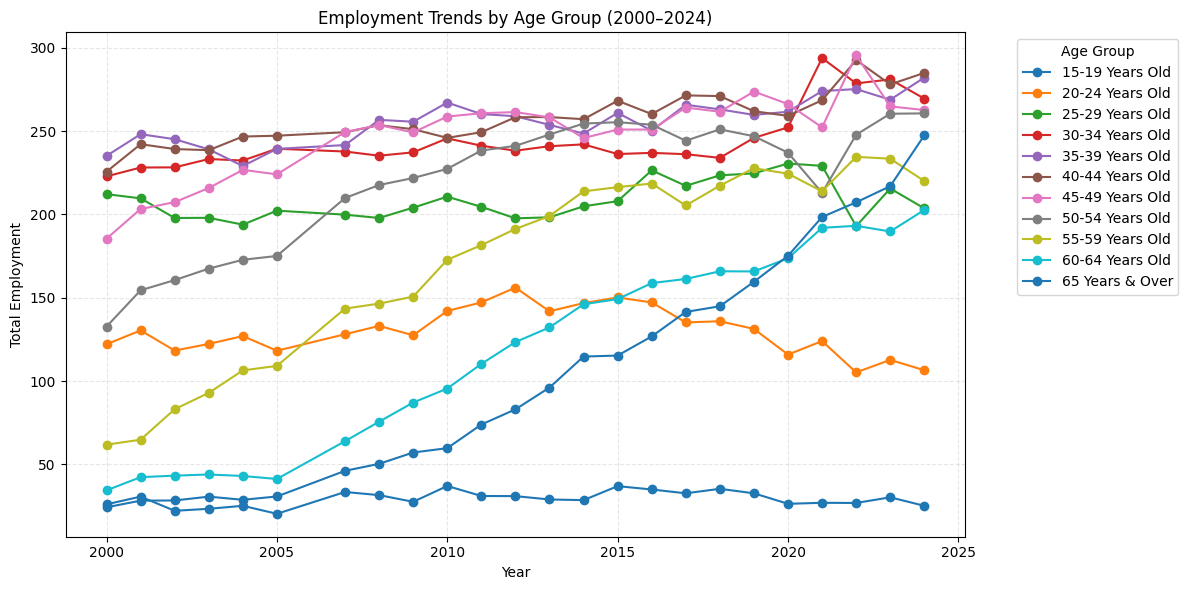

In [246]:
# Group by Age Group and get totals for each year
age_trend_df = age_df.groupby("Age Group")[year_cols].sum().T
age_trend_df.index = [int(y) for y in age_trend_df.index] 

# Create the chart visualization
plt.figure(figsize=(12,6))
for age_group in age_trend_df.columns:
    plt.plot(age_trend_df.index, age_trend_df[age_group], marker="o", label=age_group)

plt.title("Employment Trends by Age Group (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Total Employment")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Employment Trends by Age Group (2000–2024)

- **Mid-age workers (30–54 years old)** has the highest and most stable employment levels over year.  
- **Younger groups (15–24 years old)** show low and flat employment trends, mainly due to extended education and later entry into full-time work.
- These patterns highlight the importance of **lifelong learning and career upskilling** to sustain employability in a maturing labor market.
